# Business Understanding

# Initial Data Preparation


#### `Import libraries`

In [100]:
import numpy as np
# Data frame
import pandas as pd
# viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# missing values and oultiers
import missingno as msg
# data generation
from imblearn.over_sampling import SMOTE
# dimenisonality reduction
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
# spliting data
from sklearn.model_selection import train_test_split
# preprocessing and feature transformation 
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import PowerTransformer,OrdinalEncoder,OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn_features.transformers import DataFrameSelector
# validtion data
from sklearn.model_selection import cross_val_score,cross_validate
# moodels
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
# all model in one at first then make tuning
from lazypredict.Supervised import LazyClassifier
#classfication metrics
from sklearn.metrics import recall_score,confusion_matrix,accuracy_score
# deploy
import joblib

In [101]:
df=pd.read_csv("zomato.csv")

## Big Picture Of Data

In [102]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [104]:
# numerical columns
df.describe()

,votes
count,51717.00
mean,283.70
std,803.84
min,0.00
25%,7.00
50%,41.00
75%,198.00
max,16832.00


In [105]:
# caterogical columns
df.describe(include="O")

,url,address,name,online_order,book_table,rate,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717,51717,51717,51717,51717,43942,50509,51696,51490,23639,51672,51371,51717,51717,51717,51717
unique,51717,11495,8792,2,2,64,14926,93,93,5271,2723,70,22513,9098,7,30
top,https://www.zomato.com/bangalore/jalsa-banasha...,Delivery Only,Cafe Coffee Day,Yes,No,NEW,080 43334321,BTM,Quick Bites,Biryani,North Indian,300,[],[],Delivery,BTM
freq,1,128,96,30444,45268,2208,216,5124,19132,182,2913,7576,7595,39617,25942,3279


## Data cleaning

* url , name , reviews_list,phone is not important to insights

In [106]:
df.drop(columns=["url" , "name" , "reviews_list","phone","votes"],axis=1,inplace=True)

# df.drop("address",axis=1,inplace=True)

* create target from rate 

In [107]:
df["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [108]:
df["rate"].value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [109]:
# i will drop the new rating
df.drop(index=df[df["rate"]=="NEW"].index.to_list(),axis=0,inplace=True)

In [110]:
df["rate"].value_counts()

rate
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
3.8 /5    1851
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 63, dtype: int64

In [111]:
def handle_rate(rate):
    try:
        return rate.split("/")[0]
    except:
        return np.nan
df["rate"]=df["rate"].apply(handle_rate)

In [112]:
df["rate"].value_counts()

rate
3.9     2098
3.8     2022
3.7     2011
3.9     1874
3.8     1851
        ... 
2.2        7
2.0        7
2.0        4
1.8        3
1.8        2
Name: count, Length: 63, dtype: int64

In [113]:
df["rate"].isna().sum()

7775

In [114]:
df["rate"].isna().sum()/df.shape[0]

0.15704215395180673

In [115]:
# handle column names
df.columns=df.columns.str.lower()
df.columns

Index(['address', 'online_order', 'book_table', 'rate', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [116]:
df["rate"]=pd.to_numeric(df["rate"],errors="coerce")

In [117]:
def create_traget(rate):
        if rate >=3.75:
         return "Yes"
        elif rate <3.75:
          return "No" 
        else:
            np.nan
df["target"]=df["rate"].apply(create_traget)

In [118]:
# drop rate 
df.drop(columns=["rate"],axis=1,inplace=True)

In [119]:
# check nulls
df.isna().sum().sort_values(ascending=False)

dish_liked                     26017
target                          7844
approx_cost(for two people)      345
rest_type                        225
cuisines                          45
location                          21
address                            0
online_order                       0
book_table                         0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [120]:
df.isna().sum().sort_values(ascending=False)/df.shape[0]

dish_liked                    0.53
target                        0.16
approx_cost(for two people)   0.01
rest_type                     0.00
cuisines                      0.00
location                      0.00
address                       0.00
online_order                  0.00
book_table                    0.00
menu_item                     0.00
listed_in(type)               0.00
listed_in(city)               0.00
dtype: float64

In [121]:
df.drop(columns=["dish_liked"],axis=1,inplace=True)

In [122]:
df.drop(index=df[df["target"].isna()].index.to_list(),axis=0,inplace=True)

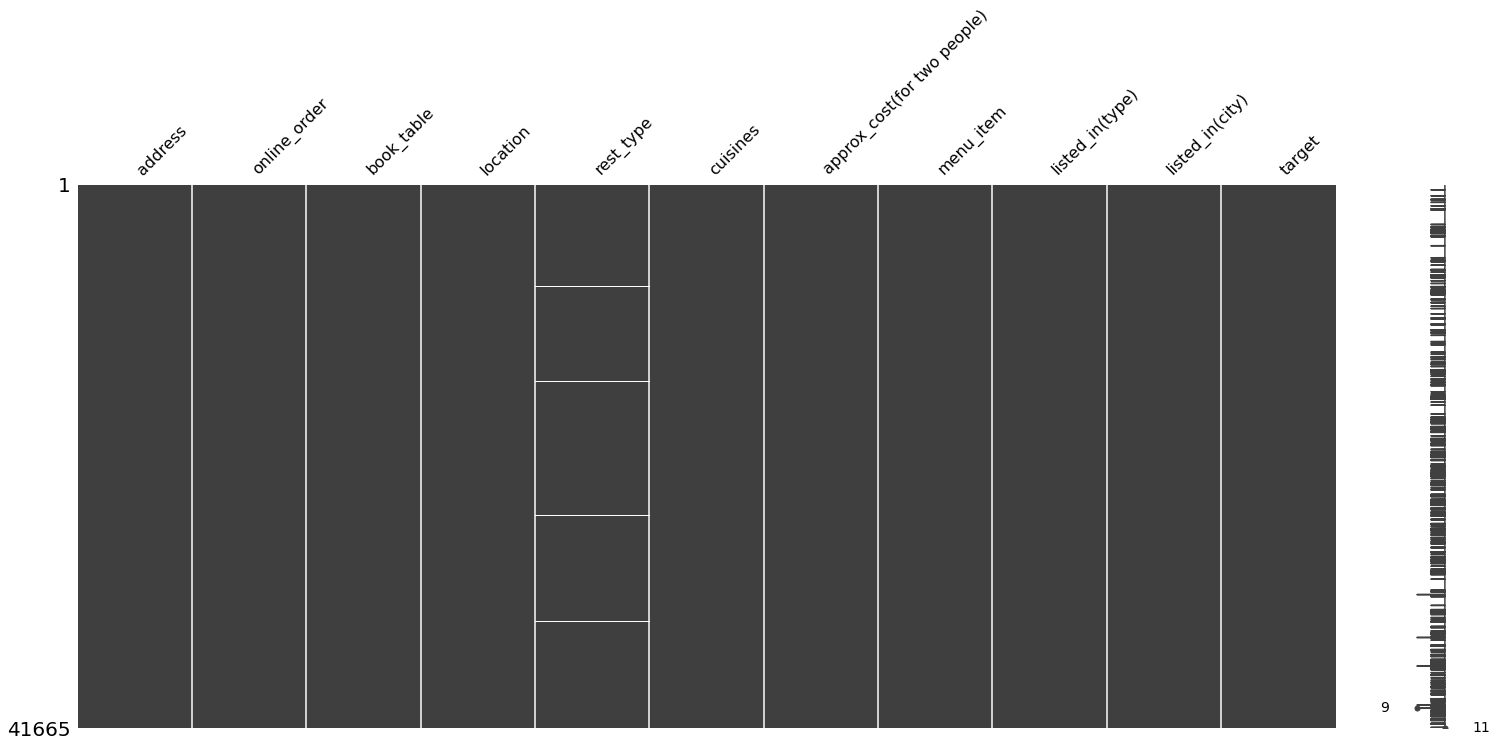

In [123]:
msg.matrix(df);

In [124]:
#ckeck duplicated
df.duplicated().sum()

69

In [125]:
# i will drop this duplicates
df.drop_duplicates(inplace=True)

In [126]:
df.duplicated().sum()

0

In [127]:
df.dtypes

address                        object
online_order                   object
book_table                     object
location                       object
rest_type                      object
cuisines                       object
approx_cost(for two people)    object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
target                         object
dtype: object

In [128]:
df.rename(columns={"listed_in(type)":"resturant_catogray"},inplace=True)

In [129]:
df.rename(columns={"listed_in(city)":"city"},inplace=True)

In [130]:
df["approx_cost"]=pd.to_numeric(df["approx_cost(for two people)"],errors="coerce")

In [131]:
df.drop(columns="approx_cost(for two people)",axis=1,inplace=True)

In [132]:
df.rename(columns={"address":"Delivery or rest"},inplace=True)

In [133]:
df.dtypes

Delivery or rest       object
online_order           object
book_table             object
location               object
rest_type              object
cuisines               object
menu_item              object
resturant_catogray     object
city                   object
target                 object
approx_cost           float64
dtype: object

In [134]:
df["approx_cost"].isna().sum()

6878

In [135]:
def handle_cuisines(value):
    try:
        return len(value.split(","))
    except:
        return np.nan

df["cuisines"]=df["cuisines"].apply(handle_cuisines)

In [136]:
df["cuisines"].isna().sum()

11

In [137]:
len(df["menu_item"][1000].split(","))

100

In [138]:
def handle_menu_item(value):
    try:
        return len(value.split(","))
    except:
        return np.nan

df["menu_item"]=df["menu_item"].apply(handle_menu_item)

In [139]:
df.describe(include="O")

,Delivery or rest,online_order,book_table,location,rest_type,resturant_catogray,city,target
count,41596,41596,41596,41596,41447,41596,41596,41596
unique,8855,2,2,92,87,7,30,2
top,Delivery Only,Yes,No,BTM,Quick Bites,Delivery,BTM,No
freq,86,27173,35313,3904,13909,20609,2598,21386


In [140]:
def handle_address(value):
    try:
        if value=="Delivery Only":
            return value
        else:
            return "Delivery and rest"
    except:
        return np.nan

df["Delivery or rest"]=df["Delivery or rest"].apply(handle_address)

In [141]:
df.head()

,Delivery or rest,online_order,book_table,location,rest_type,cuisines,menu_item,resturant_catogray,city,target,approx_cost
0,Delivery and rest,Yes,Yes,Banashankari,Casual Dining,3.00,1,Buffet,Banashankari,Yes,800.00
1,Delivery and rest,Yes,No,Banashankari,Casual Dining,3.00,1,Buffet,Banashankari,Yes,800.00
2,Delivery and rest,Yes,No,Banashankari,"Cafe, Casual Dining",3.00,1,Buffet,Banashankari,Yes,800.00
3,Delivery and rest,No,No,Banashankari,Quick Bites,2.00,1,Buffet,Banashankari,No,300.00
4,Delivery and rest,No,No,Basavanagudi,Casual Dining,2.00,1,Buffet,Banashankari,Yes,600.00


In [142]:
def handle_rest_type(value):
    try:
        return len(value.split(","))
    except:
        return np.nan

df["rest_type"]=df["rest_type"].apply(handle_rest_type)

In [143]:
df["resturant_catogray"].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [144]:
df["city"].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [145]:
df.sample()

,Delivery or rest,online_order,book_table,location,rest_type,cuisines,menu_item,resturant_catogray,city,target,approx_cost
45146,Delivery and rest,Yes,No,Kaggadasapura,1.00,3.00,51,Delivery,Old Airport Road,No,350.00


In [146]:
df.rename(columns={"rest_type":"#rest_types"},inplace=True)
df.rename(columns={"cuisines":"#cuisines"},inplace=True)
df.rename(columns={"menu_item":"#menu_items"},inplace=True)

# EDA

In [147]:
numerical_features=df.select_dtypes(include="number").columns.to_list()
caterogical_features=df.select_dtypes(exclude="number").columns.to_list()

In [148]:
numerical_features

['#rest_types', '#cuisines', '#menu_items', 'approx_cost']

In [149]:
caterogical_features

['Delivery or rest',
 'online_order',
 'book_table',
 'location',
 'resturant_catogray',
 'city',
 'target']

## univariate analysis

In [150]:
df[caterogical_features].nunique()

Delivery or rest       2
online_order           2
book_table             2
location              92
resturant_catogray     7
city                  30
target                 2
dtype: int64

In [151]:
df[caterogical_features].describe()

,Delivery or rest,online_order,book_table,location,resturant_catogray,city,target
count,41596,41596,41596,41596,41596,41596,41596
unique,2,2,2,92,7,30,2
top,Delivery and rest,Yes,No,BTM,Delivery,BTM,No
freq,41510,27173,35313,3904,20609,2598,21386


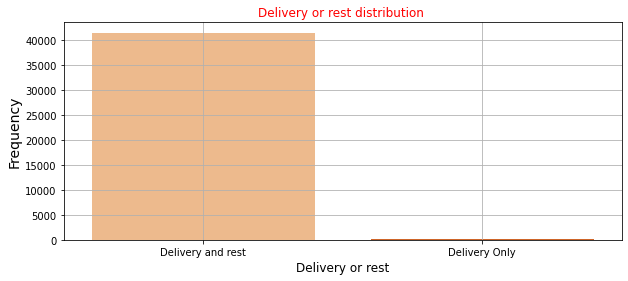

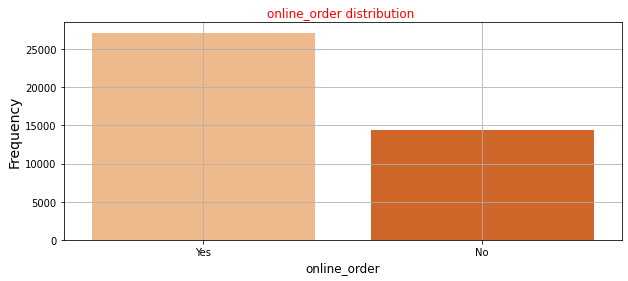

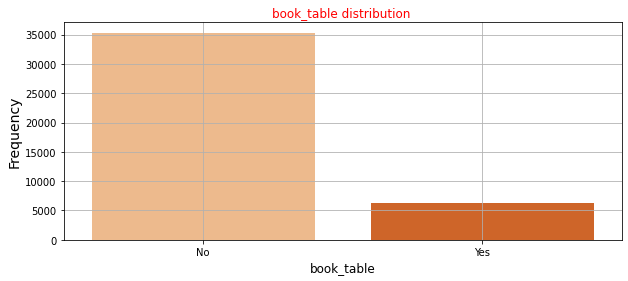

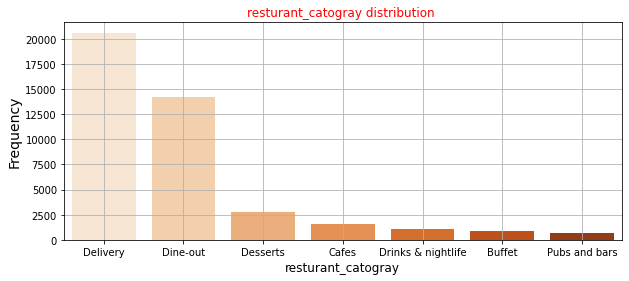

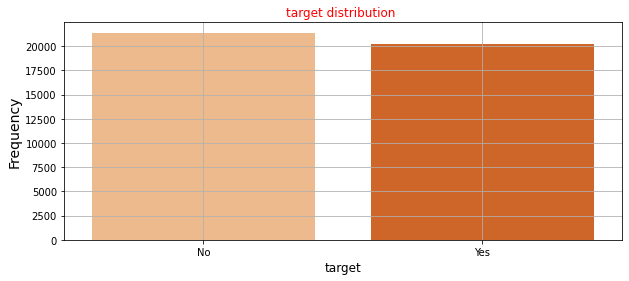

In [152]:
for feature in ["Delivery or rest","online_order","book_table","resturant_catogray","target"]:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=feature,palette="Oranges",order=df[feature].value_counts().index)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

* `this is balnced data `

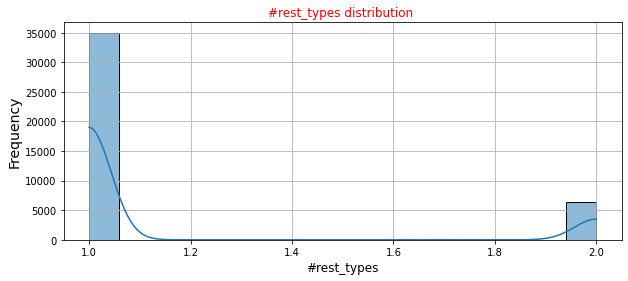

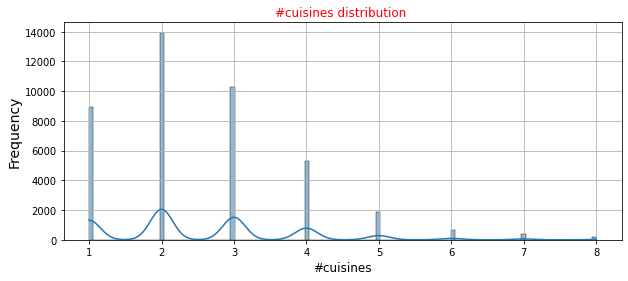

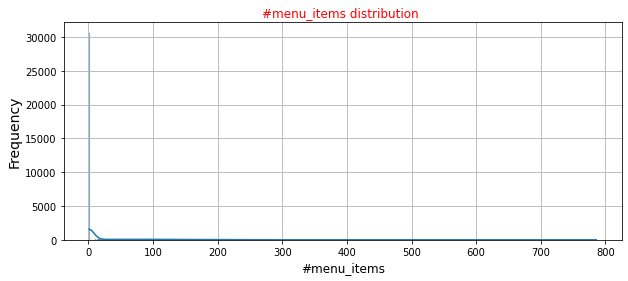

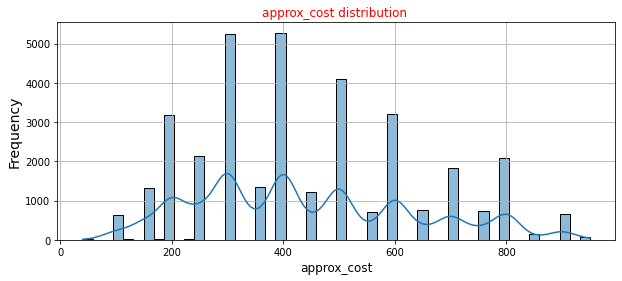

In [153]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df,x=feature,palette="Oranges",kde=True)
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

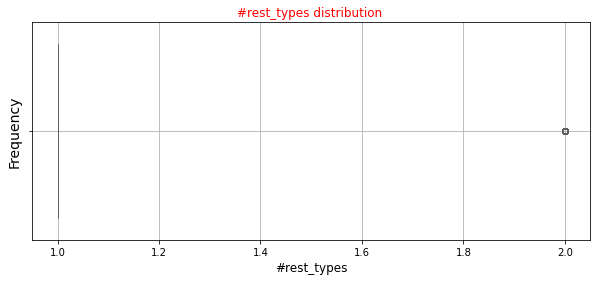

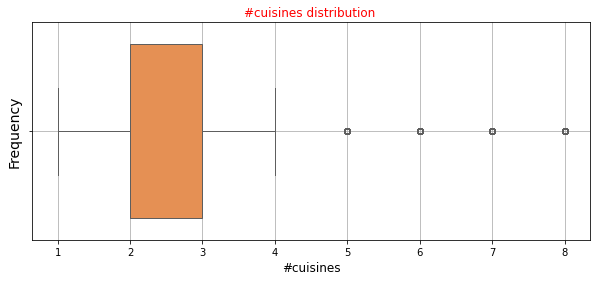

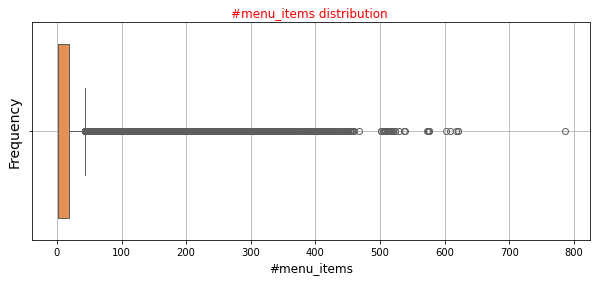

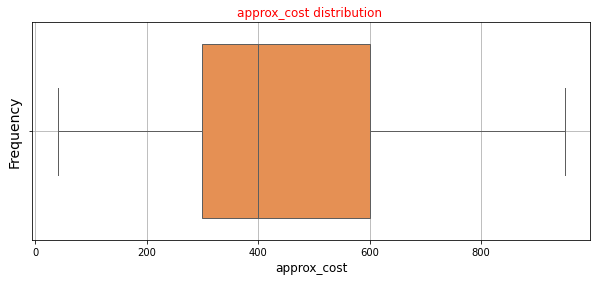

In [154]:
for feature in numerical_features:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=df,x=feature,palette="Oranges")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution ",fontsize=12,color="red")
    plt.grid()
    plt.show()

## bivariate analysis

<Figure size 720x288 with 0 Axes>

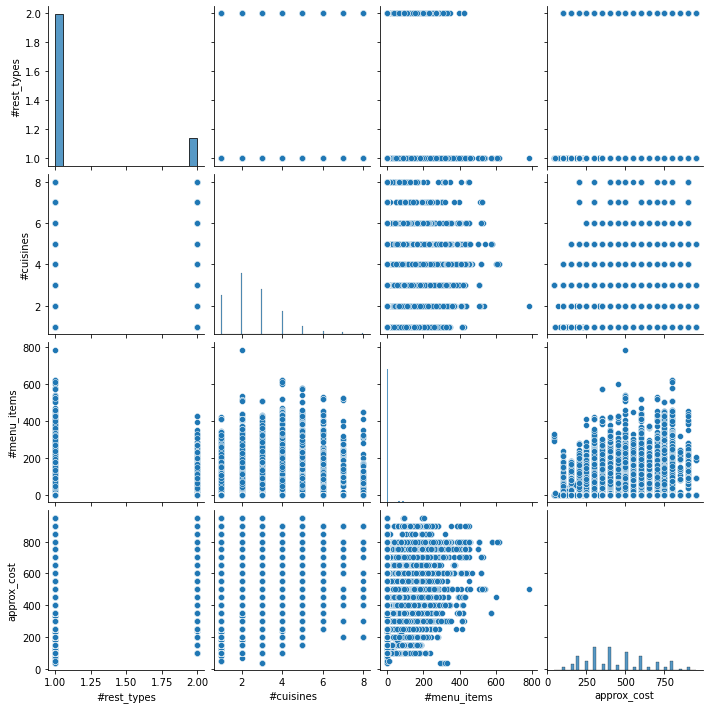

In [155]:
plt.figure(figsize=(10,4))
sns.pairplot(data=df[numerical_features])
plt.show()

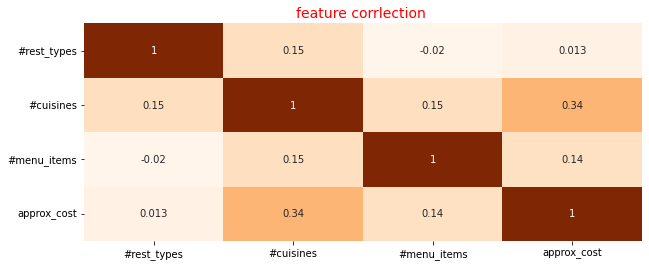

In [156]:
plt.figure(figsize=(10,4))
plt.title("feature corrlection ",fontsize=14,color="red")
sns.heatmap(df[numerical_features].corr(),annot=True,cbar=False,cmap="Oranges")
plt.show()

In [157]:
df.groupby(["target"])[numerical_features].mean()

,#rest_types,#cuisines,#menu_items,approx_cost
target,,,,
No,1.11,2.30,26.35,401.40
Yes,1.20,2.82,34.25,494.89


In [158]:
px.box(data_frame=df,x="approx_cost",color="target",color_discrete_sequence=px.colors.qualitative.Dark24_r)

In [159]:
df.columns

Index(['Delivery or rest', 'online_order', 'book_table', 'location',
       '#rest_types', '#cuisines', '#menu_items', 'resturant_catogray', 'city',
       'target', 'approx_cost'],
      dtype='object')

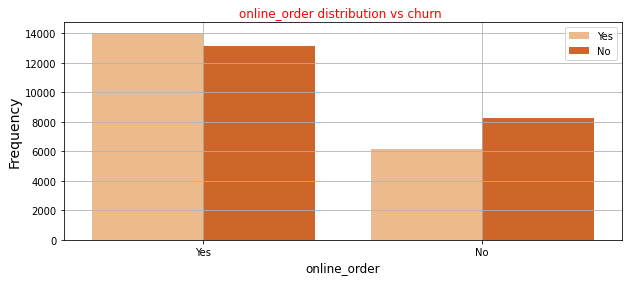

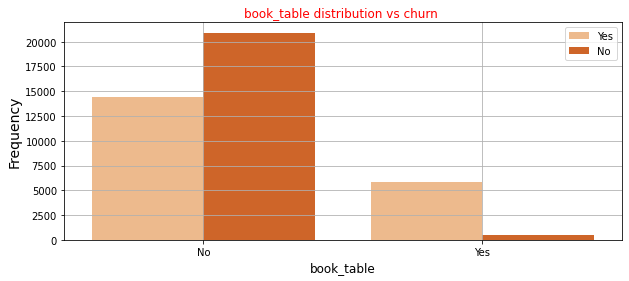

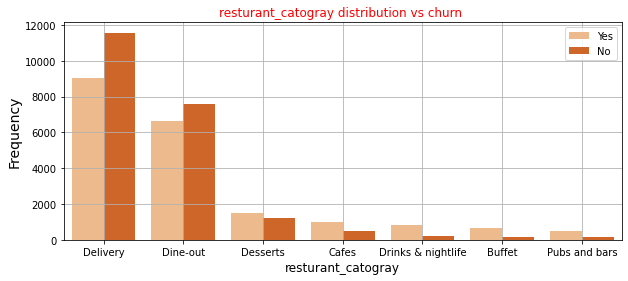

In [160]:
for feature in ["online_order","book_table","resturant_catogray"]:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df,x=feature,palette="Oranges",order=df[feature].value_counts().index,hue="target")
    plt.xlabel(feature,fontsize=12,color="black")
    plt.ylabel("Frequency",fontsize=14,color="black")
    plt.title(f"{feature} distribution vs churn ",fontsize=12,color="red")
    plt.legend()
    plt.grid()
    plt.show()

In [161]:
pd.crosstab(df["target"],df["book_table"],normalize=True)

book_table,No,Yes
target,,
No,0.50,0.01
Yes,0.35,0.14


In [162]:
pd.crosstab(df["target"],df["online_order"],normalize=True)

online_order,No,Yes
target,,
No,0.20,0.32
Yes,0.15,0.34


## Multivariate Analysis

In [163]:
pd.pivot_table(data=df,index="target",columns=["online_order"],values="approx_cost",aggfunc="mean")

online_order,No,Yes
target,,
No,388.83,408.57
Yes,489.25,496.44


In [164]:
px.box(data_frame=df,y="approx_cost",x="target",facet_col="online_order",color_discrete_sequence=px.colors.qualitative.Dark24_r)

# Spliting data 

In [165]:
X=df.drop("target",axis=1)
y=df["target"]

In [166]:
dict_target={
    "Yes":1,
    "No":0
}
y=y.map(dict_target)

In [167]:
X.shape,y.shape

((41596, 10), (41596,))

In [168]:
# split data to train,test 
# train will be portion in cross validation
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.01,stratify=y,shuffle=True,random_state=42)

In [169]:
print('X_train.shape \t', X_train.shape)
print('y_train.shape \t', y_train.shape)
print('***'*10)
print('X_test.shape \t', X_test.shape)
print('y_test.shape \t', y_test.shape)

X_train.shape 	 (41180, 10)
y_train.shape 	 (41180,)
******************************
X_test.shape 	 (416, 10)
y_test.shape 	 (416,)


# Data preprocessing 

In [170]:
X.head()

,Delivery or rest,online_order,book_table,location,#rest_types,#cuisines,#menu_items,resturant_catogray,city,approx_cost
0,Delivery and rest,Yes,Yes,Banashankari,1.00,3.00,1,Buffet,Banashankari,800.00
1,Delivery and rest,Yes,No,Banashankari,1.00,3.00,1,Buffet,Banashankari,800.00
2,Delivery and rest,Yes,No,Banashankari,2.00,3.00,1,Buffet,Banashankari,800.00
3,Delivery and rest,No,No,Banashankari,1.00,2.00,1,Buffet,Banashankari,300.00
4,Delivery and rest,No,No,Basavanagudi,1.00,2.00,1,Buffet,Banashankari,600.00


In [171]:
num_continous_cols=["approx_cost","#menu_items"]
num_discrete_cols=['#rest_types', '#cuisines']
cat_cols=X.select_dtypes(exclude="number").columns.to_list()

In [172]:
models=[
    ("rf",RandomForestClassifier()),
    ("xgb",xgb.XGBClassifier())
]

In [173]:
cat_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(cat_cols)),
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("encoder",OrdinalEncoder())
])
num_continous_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(num_continous_cols)),
    ("impute",SimpleImputer(strategy="median")),
    ("tranform",StandardScaler()) 
])
num_discrete_pipe=Pipeline(steps=[
    ("selector",DataFrameSelector(num_discrete_cols)),
    ("impute",SimpleImputer(strategy="most_frequent")),
    ("tranform",StandardScaler()) 
])
all_pipe=FeatureUnion(transformer_list=[
    ("caterogical_pipline",cat_pipe),
    ("num_continous_pipe",num_continous_pipe),
    ("num_discrete_pipe",num_discrete_pipe),
])
X_train=all_pipe.fit_transform(X_train)
X_test=all_pipe.transform(X_test)

In [220]:
df["approx_cost"].max()

950.0

## feature selection

# Feature Selection tecinques
* random froseset  --> make id as noise column and drop all have feature less then him 
* heatmap corrlection
* pca


* `random froseset  --> make id as noise column and drop all have feature less then him `

In [174]:
# X_train_with_noise=np.c_[X_train,np.random.rand(X_train.shape[0],1)]
# X_test_with_noise=np.c_[X_test,np.random.rand(X_test.shape[0],1)]

In [175]:
# forst_clf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=45)
# forst_clf.fit(X_train_with_noise, y_train)

In [176]:
# columns_sorted=cat_cols+num_cols+["random_column"]

In [177]:
# forst_clf.feature_importances_

In [178]:
# pd.Series(forst_clf.feature_importances_,index=columns_sorted).sort_values(ascending=False)

In [179]:
# important_columns=pd.Series(forst_clf.feature_importances_,index=columns_sorted).sort_values(ascending=False).loc[:"random_column"].drop("random_column").index.tolist()

In [180]:
# important_columns

In [181]:
# # convert X_train_with_noise to data frame
# X_train_with_noise=pd.DataFrame(X_train_with_noise,columns=columns_sorted)
# X_test_with_noise=pd.DataFrame(X_test_with_noise,columns=columns_sorted)

In [182]:
# X_train_with_out_noise=X_train_with_noise.loc[:,important_columns]
# X_test_with_out_noise=X_test_with_noise.loc[:,important_columns]

-------------------

* `pca`

In [183]:
# pca_full_features=PCA(n_components=None)
# pca_full_features.fit(X_train)
# sum(pca_full_features.explained_variance_ratio_)


In [184]:
# ## Let's get the cumsum of the explained var ratio
# cumsum_pca = np.cumsum(pca_full_features.explained_variance_ratio_)

# ## plotting
# plt.plot(range(1, len(cumsum_pca) + 1), cumsum_pca)
# plt.title('No of Features vs. Variance')
# plt.xlabel('No of Features')
# plt.ylabel('Variance')
# plt.show()

In [185]:
# pca_3=PCA(n_components=3)
# pca_3.fit(X_train)
# sum(pca_3.explained_variance_ratio_)

---------------------

* `heatmap corrlection`

In [186]:
df[num_continous_cols].corr()

,approx_cost,#menu_items
approx_cost,1.00,0.14
#menu_items,0.14,1.00


---------------------

# Buliding Models

## choose models to be tuned from general look on classifcation models

In [187]:
# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train,X_test,y_train,y_test)
# model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)
# models


In [188]:
# for model in models:    
#  scores = cross_validate(all_pipe, X=X, y=y, cv=5, scoring='accuracy',return_train_score=True)
#  print(model[0])
#  print("train acc : ",scores["train_score"].mean())
#  print("test acc : ",scores["test_score"].mean())
#  print("*"*25)

---------------------------------

## RandomForestClassifier

In [189]:
# inalization for models
forst_clf = RandomForestClassifier(n_estimators=150, criterion="gini", max_depth=25,max_features=10
                                   ,random_state=45)
forst_clf.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_forest = forst_clf.predict(X_train)
y_pred_test_forest = forst_clf.predict(X_test)

## Evaluate
score_train_forest = accuracy_score(y_train, y_pred_train_forest)
score_test_forest = accuracy_score(y_test, y_pred_test_forest)

print(f'accuracy_score Score for Training Dataset using RandomForest Classifier  {score_train_forest * 100 :.3f}')
print(f'accuracy_score Score for Testing Dataset using RandomForestClassifier  {score_test_forest * 100 :.3f}')


accuracy_score Score for Training Dataset using RandomForest Classifier  93.273
accuracy_score Score for Testing Dataset using RandomForestClassifier  83.173


### Confusion Matrix

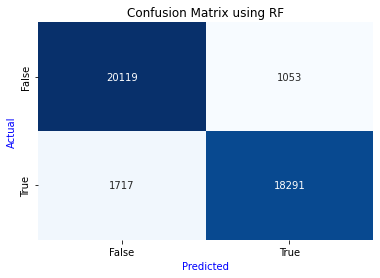

In [190]:
## plotting
confusion_matrix_train_forest = confusion_matrix(y_train, y_pred_train_forest)
sns.heatmap(confusion_matrix_train_forest, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using RF', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

### croos validation

In [191]:
scores_forest = cross_val_score(estimator=forst_clf, X=X_train, y=y_train, cv=5, scoring='accuracy')
print(scores_forest)

[0.79541039 0.80670228 0.80245265 0.80743079 0.80706654]


------------------------------

## XGBOOST

In [197]:
xgb_classifier = xgb.XGBClassifier( max_depth=20,
    n_estimators=500,
    max_features=6
)
xgb_classifier.fit(X_train, y_train)

## Predict and evaluate 
y_pred_train_xgb_classifier = xgb_classifier.predict(X_train)
y_pred_test_xgb_classifier = xgb_classifier.predict(X_test)

## Evaluate
score_train_xgb_classifier = accuracy_score(y_train, y_pred_train_xgb_classifier)
score_test_xgb_classifier = accuracy_score(y_test, y_pred_test_xgb_classifier)

print(f'accuracy_score for Training Dataset using xgb_classifier  {score_train_xgb_classifier * 100 :.3f}')
print(f'accuracy_score for Testing Dataset using xgb_classifier  {score_test_xgb_classifier * 100 :.3f}')

accuracy_score for Training Dataset using xgb_classifier  93.290
accuracy_score for Testing Dataset using xgb_classifier  83.173


### confusion matrix

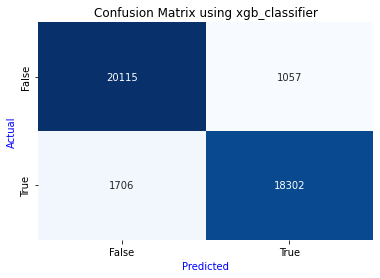

In [193]:
confusion_matrix_train_xgb_classifier = confusion_matrix(y_train, y_pred_train_xgb_classifier)
## plotting
sns.heatmap(confusion_matrix_train_xgb_classifier, fmt='.0f', annot=True, cbar=False, cmap='Blues')
plt.title('Confusion Matrix using xgb_classifier', fontsize=12, c='k')
plt.xlabel('Predicted', fontsize=10, c='b')
plt.ylabel('Actual', fontsize=10, c='b')
plt.xticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.yticks(ticks=np.arange(2) + 0.5, labels=['False', 'True'])
plt.show()

### cross validation

In [198]:
scores_xgb_classifier = cross_val_score(estimator=xgb_classifier, X=X_train, y=y_train, cv=10, scoring='accuracy')
print(scores_xgb_classifier.mean())

0.8039339485186984


------------------------

# save the model

In [221]:
joblib.dump(xgb_classifier,"xgb.pkl")

['xgb.pkl']